Stefan Pophristic + Boxuan Li
May 1st, 2025
Information Theory Project

In this script I extract teh semantic vector values of all nouns form the noun_mw.csv file and calculate the centroid values for the measurewords. 

# Parameters

In [52]:
import pandas as pd
import fasttext
import os 
from gensim.models import KeyedVectors
import seaborn as sns

import numpy as np
from numpy import dot
from numpy.linalg import norm

from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


In [20]:
os.getcwd()

'/Volumes/server/SHARED/Corpora/Universal_Dependencies/2025_InformationTheory_Project/semantic_vector_calculations'

In [23]:
# Import files 

noun_mw_df = pd.read_csv("noun_mw—manuallyAnnotated.csv")

In [24]:
noun_mw_df.head()

,Noun,MW,pre,post
0,月,个,26,0
1,人,个,18,0
2,国家,个,15,0
3,单位,个,12,0
4,县,个,10,0


In [25]:
all_nouns = noun_mw_df["Noun"].unique()
all_mw    = noun_mw_df["MW"].unique()

print(f"Number of unique nouns: {len(all_nouns)}")
print(f"Number of unique mw: {len(all_mw)}")

Number of unique nouns: 722
Number of unique mw: 26


In [27]:
mw_summary_df = noun_mw_df.groupby('MW')['pre'].sum().reset_index()
mw_summary_df = mw_summary_df.sort_values(by='pre', ascending=False)


In [28]:
mw_summary_df

,MW,pre
0,个,547
9,年,239
19,种,129
17,次,69
4,名,56
15,条,50
2,位,37
10,座,33
22,部,31
5,场,25


In [7]:
count_eq_1 = (mw_summary_df['Count_pre'] == 1).sum()
count_eq_2 = (mw_summary_df['Count_Pre'] == 2).sum()
count_eq_3 = (mw_summary_df['Count_Pre'] == 3).sum()

print(f"Number of MW with only 1 noun: {count_eq_1}")
print(f"Number of MW with only 2 noun: {count_eq_2}")
print(f"Number of MW with only 3 noun: {count_eq_3}")

Number of MW with only 1 noun: 38
Number of MW with only 2 noun: 10
Number of MW with only 3 noun: 15


In [8]:
# Import Mandarin Fasttext
model = KeyedVectors.load_word2vec_format('/Volumes/server/SHARED/Corpora/FastText/Mandarin/cc.zh.300.vec', binary=False)

In [9]:
# if you look up an individual word， it will return the semantic vector
model["人"]

array([-1.419e-01,  7.040e-02,  4.526e-01, -1.260e-01,  4.830e-02,
        1.430e-02, -1.023e-01, -5.760e-02,  4.770e-02,  5.000e-04,
        1.910e-02,  9.650e-02,  4.850e-02, -1.361e-01,  3.510e-02,
        5.050e-02, -3.300e-03, -3.230e-02, -2.930e-02, -9.220e-02,
        1.740e-02, -3.000e-03, -1.290e-02, -1.780e-02,  1.045e-01,
       -4.590e-02,  1.355e-01,  5.930e-02,  3.780e-02,  3.700e-02,
       -1.330e-02, -2.950e-02, -6.500e-03,  1.880e-02, -2.005e-01,
       -4.630e-02, -7.030e-02, -1.343e-01, -2.600e-02,  3.700e-03,
       -7.230e-02, -7.980e-02,  6.500e-03, -1.563e-01, -1.182e-01,
        6.890e-02, -5.220e-02, -2.920e-02,  8.610e-02,  3.390e-02,
       -7.130e-02,  7.220e-02,  2.830e-02, -9.450e-02, -3.400e-03,
        4.360e-02, -9.400e-03,  2.460e-02, -2.100e-02, -7.980e-02,
       -7.920e-02, -1.823e-01, -7.840e-02,  3.750e-02,  1.560e-02,
        2.800e-03, -4.840e-02,  5.720e-02, -1.470e-02,  3.910e-02,
       -4.390e-02,  5.420e-02,  3.630e-02, -4.700e-02,  2.398e

# Create Semantic Clusters

In [29]:
# Add semantic vectors for each Noun to master df 

noun_vectors = []

for noun in noun_mw_df["Noun"]:
    try:
        vector = model[noun]
    except:
        vector = []
    noun_vectors.append(vector)



In [30]:
noun_mw_df["noun_semantics"] = noun_vectors

In [31]:
noun_mw_df.head()

,Noun,MW,pre,post,noun_semantics
0,月,个,26,0,"[-0.0141, -0.0154, 0.4268, 0.0037, 0.0991, 0.2..."
1,人,个,18,0,"[-0.1419, 0.0704, 0.4526, -0.126, 0.0483, 0.01..."
2,国家,个,15,0,"[-0.0944, -0.017, 0.3647, -0.0341, -0.0831, 0...."
3,单位,个,12,0,"[0.1527, -0.158, 0.6014, -0.1045, -0.228, 0.02..."
4,县,个,10,0,"[-0.0923, 0.2401, 0.397, -0.1338, -0.1364, -0...."


In [32]:
# Re-arrange dataframe to have arrays of nouns with their corresponding MW 
# We do this for easy computation of centroids 

noun_dict = noun_mw_df.groupby('MW')['Noun'].apply(list).to_dict()
noun_dict

{'个': ['月',
  '人',
  '国家',
  '单位',
  '县',
  '车站',
  '孩子',
  '家庭',
  '属',
  '湖泊',
  '镇',
  '地区',
  '堂区',
  '市镇',
  '物种',
  '世纪',
  '乡',
  '城镇',
  '机构',
  '街道',
  '问题',
  '人物',
  '俱乐部',
  '儿子',
  '公司',
  '冠军',
  '区划',
  '原因',
  '名字',
  '团体',
  '地方',
  '城市',
  '女儿',
  '学院',
  '州',
  '席位',
  '概念',
  '社会',
  '种',
  '符号',
  '角色',
  '计划',
  '词',
  '赛季',
  '运动',
  '郡',
  '元件',
  '元素',
  '公园',
  '分支',
  '副本',
  '反应',
  '名词',
  '字',
  '字母',
  '学位',
  '小孩',
  '小岛',
  '小时',
  '小镇',
  '工作',
  '平台',
  '形态',
  '政府',
  '故事',
  '教区',
  '教授',
  '时代',
  '星期',
  '村',
  '民族',
  '炸药',
  '男孩',
  '社区',
  '粒子',
  '系统',
  '组织',
  '网站',
  '行省',
  '议席',
  '词汇',
  '谜',
  '进球',
  '阶段',
  '骨头',
  '下颌',
  '中学',
  '中心',
  '主意',
  '主角',
  '义项',
  '乐团',
  '乡镇',
  '事实',
  '井字',
  '产物',
  '亲王',
  '人选',
  '从句',
  '仪式',
  '任务',
  '企业',
  '会',
  '传统',
  '传说',
  '伯爵',
  '例子',
  '保障',
  '公国',
  '公寓',
  '公式',
  '公爵',
  '关系',
  '军团',
  '分站',
  '分类',
  '别名',
  '力量',
  '化石',
  '区域',
  '历史',
  '原子',
  '原理',
  '参考',
  '反例',
  '受体',


In [70]:
# Calculate centroids
# Note that this noramlizes the centroids (don't fully understand that but chatgpt recommends it)

mw_centroids = {}

for mw, words in noun_dict.items():
    vectors = []
    for word in words:
        if word in model:
            vectors.append(model[word])
    if vectors:
        centroid = np.mean(vectors, axis=0)
        # centroid = centroid / np.linalg.norm(centroid) # Centroid Normalization line
        mw_centroids[mw] = centroid


In [71]:
# Add centroids back into the main df
noun_mw_df['MW_centroid'] = noun_mw_df['MW'].map(mw_centroids)


In [72]:
noun_mw_df.head()

,Noun,MW,pre,post,noun_semantics,MW_centroid,cosine_sim
0,月,个,26,0,"[-0.0141, -0.0154, 0.4268, 0.0037, 0.0991, 0.2...","[-0.006889135, 0.022415334, 0.46960643, -0.039...",0.318850
1,人,个,18,0,"[-0.1419, 0.0704, 0.4526, -0.126, 0.0483, 0.01...","[-0.006889135, 0.022415334, 0.46960643, -0.039...",0.416342
2,国家,个,15,0,"[-0.0944, -0.017, 0.3647, -0.0341, -0.0831, 0....","[-0.006889135, 0.022415334, 0.46960643, -0.039...",0.545932
3,单位,个,12,0,"[0.1527, -0.158, 0.6014, -0.1045, -0.228, 0.02...","[-0.006889135, 0.022415334, 0.46960643, -0.039...",0.522457
4,县,个,10,0,"[-0.0923, 0.2401, 0.397, -0.1338, -0.1364, -0....","[-0.006889135, 0.022415334, 0.46960643, -0.039...",0.524134


In [73]:
# Calculate Cosine similarity between the given noun and the MW
# Higher value = more similar

def cosine_similarity(vec1, vec2):
    if (vec1 is None or vec2 is None or 
        len(vec1) != 300 or len(vec2) != 300):
        return np.nan
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))
    
noun_mw_df['cosine_sim'] = noun_mw_df.apply(
    lambda row: cosine_similarity(row['noun_semantics'], row['MW_centroid']),
    axis=1
)


In [74]:
noun_mw_df.head()

,Noun,MW,pre,post,noun_semantics,MW_centroid,cosine_sim
0,月,个,26,0,"[-0.0141, -0.0154, 0.4268, 0.0037, 0.0991, 0.2...","[-0.006889135, 0.022415334, 0.46960643, -0.039...",0.318850
1,人,个,18,0,"[-0.1419, 0.0704, 0.4526, -0.126, 0.0483, 0.01...","[-0.006889135, 0.022415334, 0.46960643, -0.039...",0.416342
2,国家,个,15,0,"[-0.0944, -0.017, 0.3647, -0.0341, -0.0831, 0....","[-0.006889135, 0.022415334, 0.46960643, -0.039...",0.545932
3,单位,个,12,0,"[0.1527, -0.158, 0.6014, -0.1045, -0.228, 0.02...","[-0.006889135, 0.022415334, 0.46960643, -0.039...",0.522457
4,县,个,10,0,"[-0.0923, 0.2401, 0.397, -0.1338, -0.1364, -0....","[-0.006889135, 0.022415334, 0.46960643, -0.039...",0.524134


In [99]:
# Filter out 5 most common measure words 

common_df = noun_mw_df[noun_mw_df['MW'] != "个"].copy()
common_df = common_df[common_df['MW'] != "年"].copy()

top_mws = (
    common_df.groupby("MW")["pre"]
    .sum()
    .nsmallest(5)
    .index
)

# Step 2: Filter the DataFrame to include only rows with those top MWs
common_df = common_df[common_df["MW"].isin(top_mws)]

In [100]:
common_df["MW"].unique()

array(['届', '篇', '辆', '只', '层'], dtype=object)

In [101]:
common_df.head()

,Noun,MW,pre,post,noun_semantics,MW_centroid,cosine_sim
738,大会,届,3,0,"[-0.067, -0.0633, 0.5933, -0.1428, -0.1647, -0...","[-0.04072857, -0.038685717, 0.5458285, -0.1144...",0.697716
739,比赛,届,2,0,"[-0.0498, 0.0299, 0.5236, -0.1769, -0.112, -0....","[-0.04072857, -0.038685717, 0.5458285, -0.1144...",0.713899
740,会议,届,1,0,"[0.1563, 0.0568, 0.4993, 0.0176, -0.1654, -0.1...","[-0.04072857, -0.038685717, 0.5458285, -0.1144...",0.701492
741,头衔,届,1,0,"[-0.2894, -0.1298, 0.5425, -0.3144, 0.1271, 0....","[-0.04072857, -0.038685717, 0.5458285, -0.1144...",0.670154
742,委员,届,1,0,"[-0.093, 0.0596, 0.6497, -0.2688, -0.1249, -0....","[-0.04072857, -0.038685717, 0.5458285, -0.1144...",0.633727


In [102]:
# Filter out rows with invalid vectors
valid_df = common_df[common_df["noun_semantics"].apply(lambda x: isinstance(x, (list, np.ndarray)) and len(x) == 300)]

# Ensure the "Pre" column is included in the dataframe
valid_df_copy = valid_df.copy()

valid_df_copy.head()

,Noun,MW,pre,post,noun_semantics,MW_centroid,cosine_sim
738,大会,届,3,0,"[-0.067, -0.0633, 0.5933, -0.1428, -0.1647, -0...","[-0.04072857, -0.038685717, 0.5458285, -0.1144...",0.697716
739,比赛,届,2,0,"[-0.0498, 0.0299, 0.5236, -0.1769, -0.112, -0....","[-0.04072857, -0.038685717, 0.5458285, -0.1144...",0.713899
740,会议,届,1,0,"[0.1563, 0.0568, 0.4993, 0.0176, -0.1654, -0.1...","[-0.04072857, -0.038685717, 0.5458285, -0.1144...",0.701492
741,头衔,届,1,0,"[-0.2894, -0.1298, 0.5425, -0.3144, 0.1271, 0....","[-0.04072857, -0.038685717, 0.5458285, -0.1144...",0.670154
742,委员,届,1,0,"[-0.093, 0.0596, 0.6497, -0.2688, -0.1249, -0....","[-0.04072857, -0.038685717, 0.5458285, -0.1144...",0.633727


KeyError: "['MW_centroid'] not in index"

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

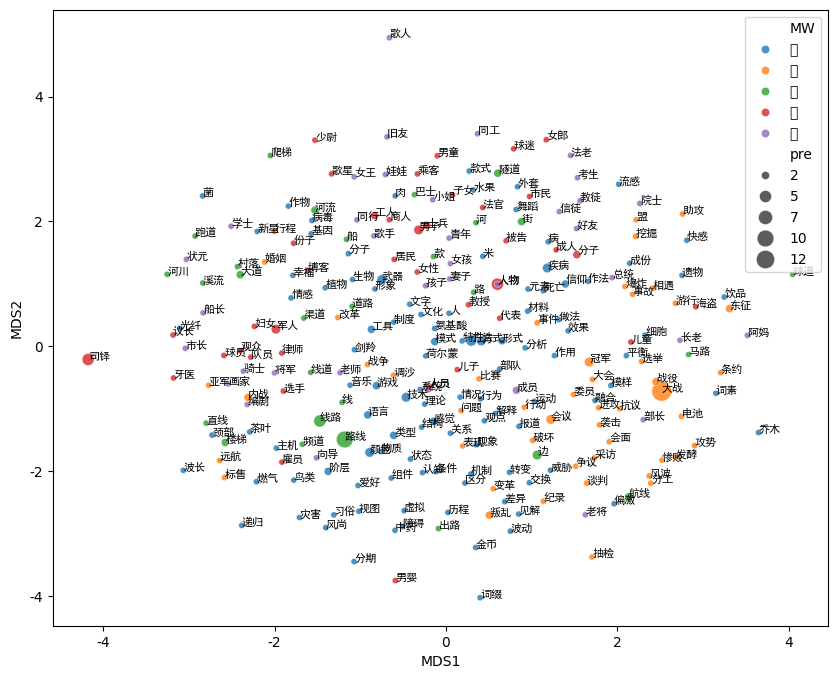

In [98]:
# Filter out rows with invalid vectors
valid_df = common_df[common_df["noun_semantics"].apply(lambda x: isinstance(x, (list, np.ndarray)) and len(x) == 300)]

# Ensure the "Pre" column is included in the dataframe
valid_df_copy = valid_df.copy()

# Stack vectors
vectors = np.vstack(valid_df_copy["noun_semantics"].values)

# Apply MDS
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)
coords = mds.fit_transform(vectors)

# Prepare data for plotting, ensuring "Pre" column is still in the dataframe
plot_df = valid_df_copy[["Noun", "MW", "pre", "noun_semantics"]].copy()  # Make sure "Pre" is included
plot_df["MDS1"] = coords[:, 0]
plot_df["MDS2"] = coords[:, 1]

# Plotting with size proportional to "Pre" column
plt.figure(figsize=(10, 8))

# Adjust dot sizes based on the "Pre" column value (scaled if necessary)
sns.scatterplot(
    data=plot_df,
    x="MDS1", y="MDS2",
    hue="MW", palette="tab10",
    size="pre", sizes=(20, 200),  # Adjust the size range here
    alpha=0.8
)

# Annotate with Chinese characters
for i, row in plot_df.iterrows():
    plt.text(row["MDS1"], row["MDS2"], row["Noun"], fontsize=8, fontproperties=font_prop)

# Extract one centroid per MW
centroid_df = plot_df.drop_duplicates(subset="MW")[["MW", "MW_centroid"]].copy()
centroid_coords = np.vstack(centroid_df["MW_centroid"].values)
centroid_df["MDS1"] = centroid_coords[:, 0]
centroid_df["MDS2"] = centroid_coords[:, 1]

# Plot centroids as larger, black-edged points using same hue (MW)
sns.scatterplot(
    data=centroid_df,
    x="MDS1", y="MDS2", hue="MW",
    palette="tab10", s=120, edgecolor='black', linewidth=1.5, marker='X', legend=False
)

plt.title("MDS Projection of Semantic Vectors (Color by MW)", fontproperties=font_prop)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Adjust legend
plt.legend(title="MW", bbox_to_anchor=(1.05, 1), loc="upper left")
legend = plt.legend(title="MW", bbox_to_anchor=(1.05, 1), loc="upper left", prop=font_prop)
legend.get_title().set_fontproperties(font_prop)

plt.tight_layout()
plt.show()


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

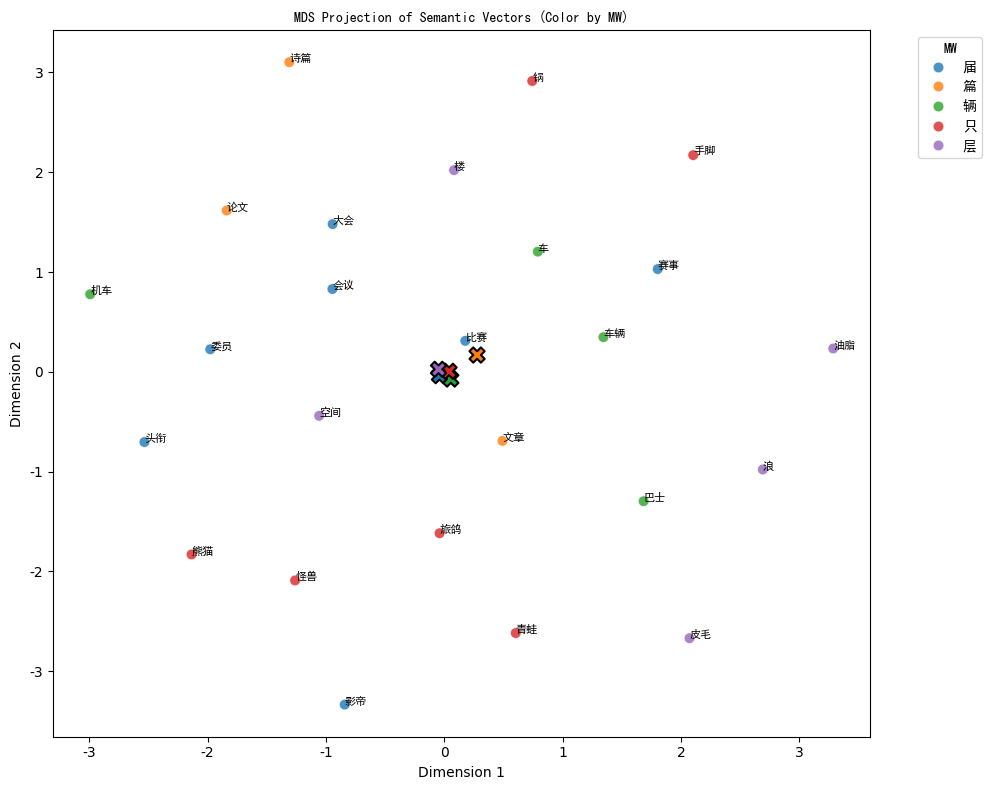

In [103]:
# Load custom font
font_path = "../SimHei.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False



# Filter out rows with invalid vectors
valid_df = common_df[common_df["noun_semantics"].apply(lambda x: isinstance(x, (list, np.ndarray)) and len(x) == 300)]

# Stack vectors
vectors = np.vstack(valid_df["noun_semantics"].values)

# Apply MDS
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)
coords = mds.fit_transform(vectors)

# Prepare data for plotting
plot_df = valid_df.copy()
plot_df["MDS1"] = coords[:, 0]
plot_df["MDS2"] = coords[:, 1]



# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plot_df, x="MDS1", y="MDS2", hue="MW", palette="tab10", s=60, alpha=0.8)


# Annotate with Chinese characters
for i, row in plot_df.iterrows():
    plt.text(row["MDS1"], row["MDS2"], row["Noun"], fontsize=8, fontproperties=font_prop)

# Extract one centroid per MW
centroid_df = plot_df.drop_duplicates(subset="MW")[["MW", "MW_centroid"]].copy()
centroid_coords = np.vstack(centroid_df["MW_centroid"].values)
centroid_df["MDS1"] = centroid_coords[:, 0]
centroid_df["MDS2"] = centroid_coords[:, 1]

# Plot centroids as larger, black-edged points using same hue (MW)
sns.scatterplot(
    data=centroid_df,
    x="MDS1", y="MDS2", hue="MW",
    palette="tab10", s=120, edgecolor='black', linewidth=1.5, marker='X', legend=False
)

plt.title("MDS Projection of Semantic Vectors (Color by MW)", fontproperties=font_prop)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="MW", bbox_to_anchor=(1.05, 1), loc="upper left")
legend = plt.legend(title="MW", bbox_to_anchor=(1.05, 1), loc="upper left", prop=font_prop)
legend.get_title().set_fontproperties(font_prop)
plt.tight_layout()
plt.show()


In [67]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 79.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.3/338.3 kB 11.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [68]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D projection
import plotly.express as px


In [78]:

# Assuming the MDS coordinates and centroids are in plot_df as done previously
# Create the 3D plot using Plotly
fig = px.scatter_3d(
    plot_df,
    x="MDS1",
    y="MDS2",
    z="MDS3",
    color="MW",
    labels={"MW": "MW Group"},
    title="Interactive 3D MDS Projection of Semantic Vectors",
    color_continuous_scale="tab10",
    opacity=0.7,
)

# Add centroids as 'X' markers on top of the existing scatter plot
for _, row in centroid_df.iterrows():
    fig.add_scatter3d(
        x=[row["MDS1"]],
        y=[row["MDS2"]],
        z=[row["MDS3"]],
        mode='markers',
        marker=dict(size=12, color=mw_to_color[row["MW"]], symbol="x", line=dict(width=2, color='black')),
        name=f"Centroid - {row['MW']}"
    )

# Set labels for the axes
fig.update_layout(
    scene=dict(
        xaxis_title="Dimension 1",
        yaxis_title="Dimension 2",
        zaxis_title="Dimension 3"
    ),
    legend_title="MW Group",
    margin=dict(l=0, r=0, b=0, t=40),  # Adjust margins if needed
)

# Show the interactive plot
fig.show()

ValueError: Value of 'z' is not the name of a column in 'data_frame'. Expected one of ['Noun', 'MW', 'pre', 'post', 'noun_semantics', 'MW_centroid', 'cosine_sim', 'MDS1', 'MDS2'] but received: MDS3

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

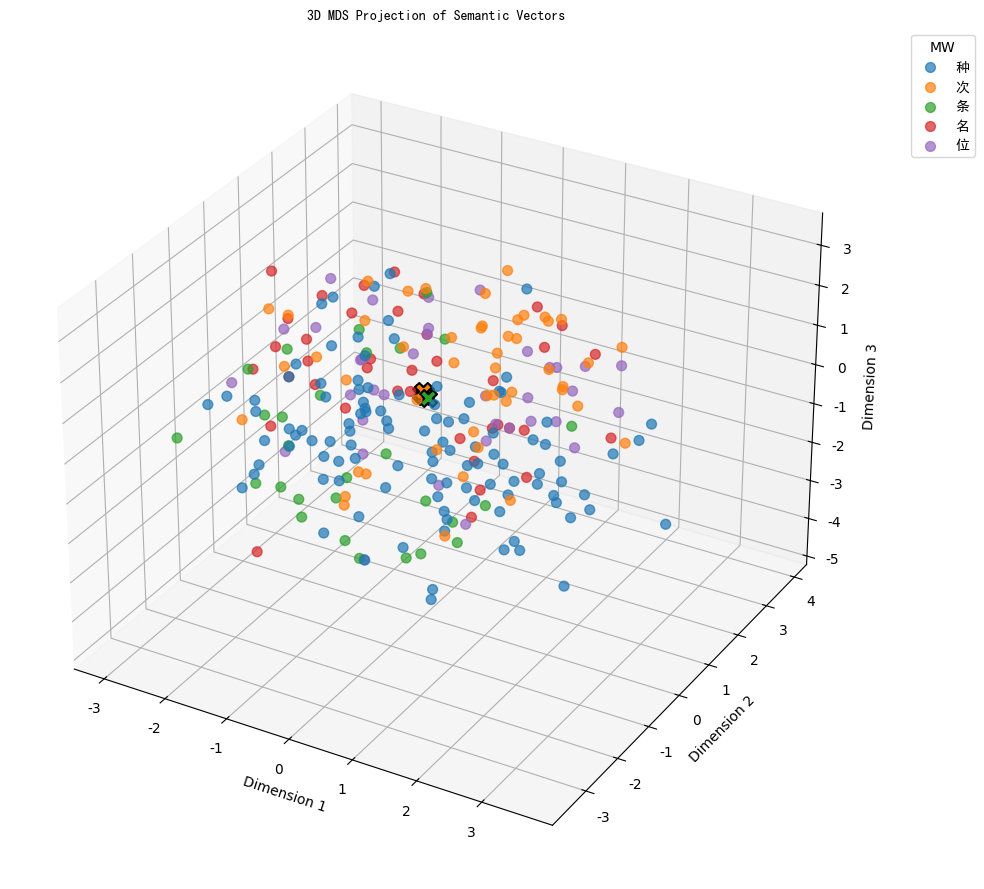

In [79]:
# Run MDS in 3D
mds = MDS(n_components=3, dissimilarity='euclidean', random_state=42)
coords_3d = mds.fit_transform(np.vstack(valid_df["noun_semantics"].values))

# Update plot_df with 3D coordinates
plot_df = valid_df.copy()
plot_df["MDS1"] = coords_3d[:, 0]
plot_df["MDS2"] = coords_3d[:, 1]
plot_df["MDS3"] = coords_3d[:, 2]

# Extract centroid coordinates (assuming MW_centroid has 3 values per row)
centroid_df = plot_df.drop_duplicates(subset="MW")[["MW", "MW_centroid"]].copy()
centroid_coords = np.vstack(centroid_df["MW_centroid"].values)
centroid_df["MDS1"] = centroid_coords[:, 0]
centroid_df["MDS2"] = centroid_coords[:, 1]
centroid_df["MDS3"] = centroid_coords[:, 2]

# Plotting in 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Get unique MWs and colors
unique_mws = plot_df["MW"].unique()
palette = sns.color_palette("tab10", n_colors=len(unique_mws))
mw_to_color = dict(zip(unique_mws, palette))

# Plot each MW group
for mw in unique_mws:
    group = plot_df[plot_df["MW"] == mw]
    color = mw_to_color[mw]
    ax.scatter(group["MDS1"], group["MDS2"], group["MDS3"], label=mw, color=color, s=50, alpha=0.7)

# Plot centroids
for _, row in centroid_df.iterrows():
    color = mw_to_color[row["MW"]]
    ax.scatter(row["MDS1"], row["MDS2"], row["MDS3"], color=color, s=150, edgecolor='black', marker='X', linewidth=1.5)

# Labels and legend
ax.set_title("3D MDS Projection of Semantic Vectors", fontproperties=font_prop)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.legend(title="MW", prop=font_prop, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/2682558606.py:28: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  plt.tight_layout()
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/2682558606.py:28: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.tight_layout()
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/2682558606.py:28: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  plt.tight_layout()
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/2682558606.py:28: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  plt.tight_layout()
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/2682558606.py:28: UserWarning: Glyph 26597 (\N{CJK UNIFIED IDEOGRAPH-67E5}) missing from current font.
  plt.tight_layout()
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipyker

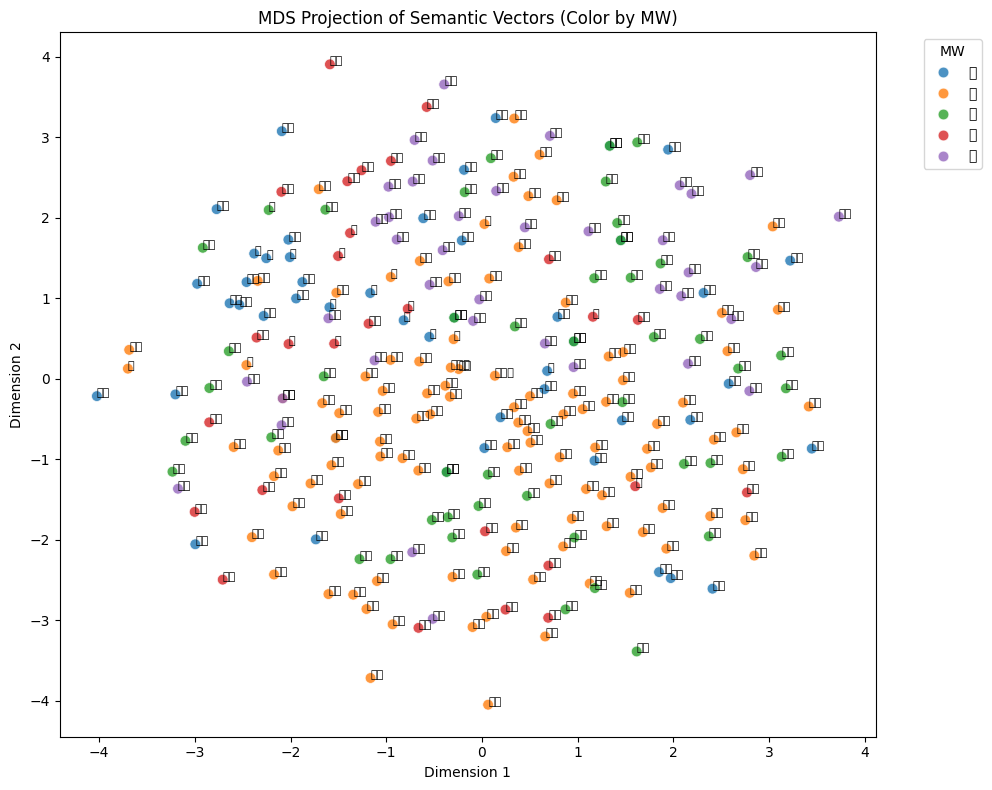

In [47]:

# Filter out rows with invalid vectors
valid_df = common_df[common_df["noun_semantics"].apply(lambda x: isinstance(x, (list, np.ndarray)) and len(x) == 300)]

# Stack vectors
vectors = np.vstack(valid_df["noun_semantics"].values)

# Apply MDS
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)
coords = mds.fit_transform(vectors)

# Prepare data for plotting
plot_df = valid_df.copy()
plot_df["MDS1"] = coords[:, 0]
plot_df["MDS2"] = coords[:, 1]

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plot_df, x="MDS1", y="MDS2", hue="MW", palette="tab10", s=60, alpha=0.8)

# Annotate points
for i, row in plot_df.iterrows():
    plt.text(row["MDS1"], row["MDS2"], row["Noun"], fontsize=8)

plt.title("MDS Projection of Semantic Vectors (Color by MW)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="MW", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/3282333533.py:23: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  plt.tight_layout()
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/3282333533.py:23: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.tight_layout()
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/3282333533.py:23: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  plt.tight_layout()
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/3282333533.py:23: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  plt.tight_layout()
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/3282333533.py:23: UserWarning: Glyph 26597 (\N{CJK UNIFIED IDEOGRAPH-67E5}) missing from current font.
  plt.tight_layout()
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipyker

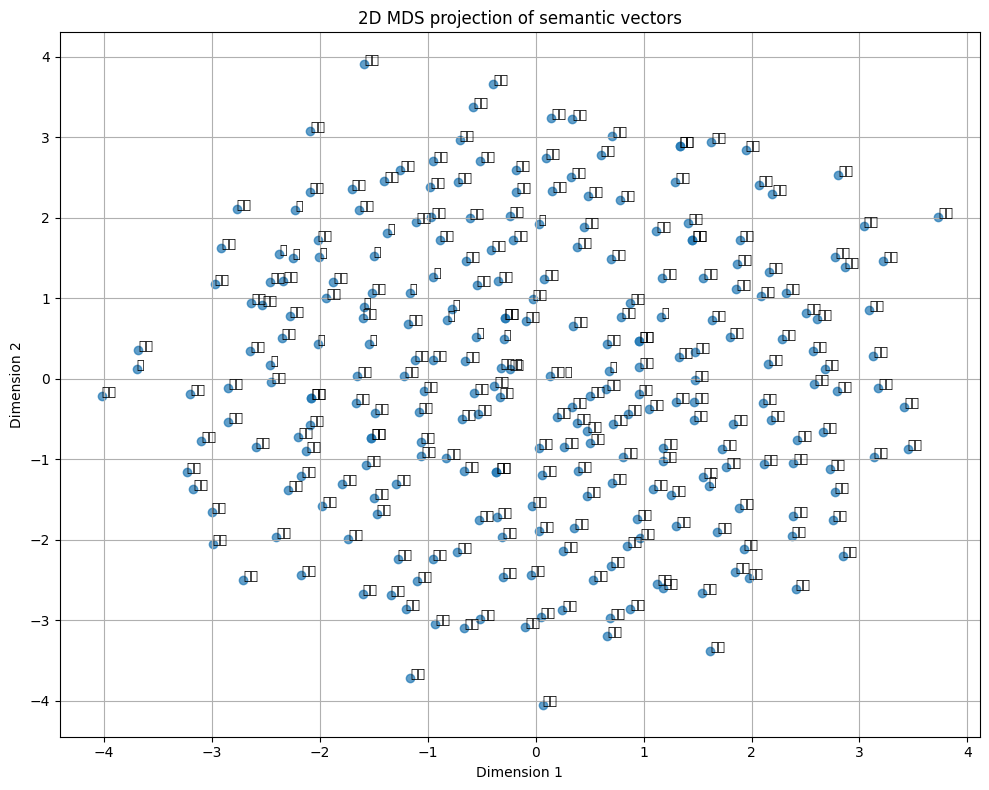

In [46]:
# Extract valid rows (exclude None or wrong-length vectors)
valid_df = common_df[common_df["noun_semantics"].apply(lambda x: isinstance(x, (list, np.ndarray)) and len(x) == 300)]

# Stack the vectors into a 2D array
vectors = np.vstack(valid_df["noun_semantics"].values)

# Apply MDS
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)
coords = mds.fit_transform(vectors)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.7)

# Annotate points with nouns
for i, noun in enumerate(valid_df["Noun"].values):
    plt.text(coords[i, 0], coords[i, 1], noun, fontsize=9)

plt.title("2D MDS projection of semantic vectors")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.tight_layout()
plt.show()

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/3270163396.py:30: UserWarning:

Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.

findfont: Font family 'SimHei' n

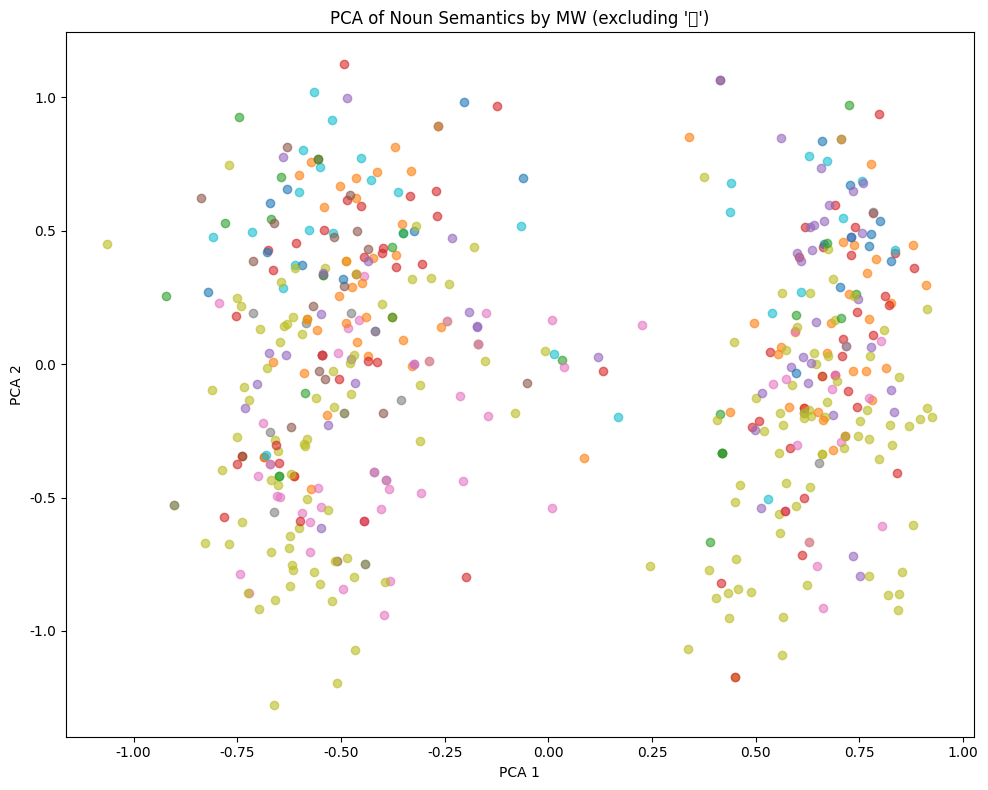

In [80]:

# 1. Filter out the rows where MW == "个"
plot_df = noun_mw_df[noun_mw_df['MW'] != "个"].copy()

# 2. Drop rows with missing vectors or invalid dimensions
plot_df = plot_df.dropna(subset=['noun_semantics'])
plot_df = plot_df[plot_df['noun_semantics'].apply(lambda x: len(x) == 300)]

# 3. Stack vectors into a matrix for PCA
X = np.vstack(plot_df['noun_semantics'].values)

# 4. Run PCA (using 2 components for 2D visualization)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# 5. Add PCA results to DataFrame
plot_df['pca_x'] = X_2d[:, 0]
plot_df['pca_y'] = X_2d[:, 1]

# 6. Plot
plt.figure(figsize=(10, 8))
groups = plot_df.groupby('MW')

for name, group in groups:
    plt.scatter(group['pca_x'], group['pca_y'], label=name, alpha=0.6)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='MW')
plt.title("PCA of Noun Semantics by MW (excluding '个')")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/4159655349.py:38: UserWarning:

Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/var/folders/0f/7mr42p3n3mxc5z1g5q3267p81ryl0h/T/ipykernel_44217/4159655349.py:38: UserWarning:

Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.

findfont: Font family 'SimHei'

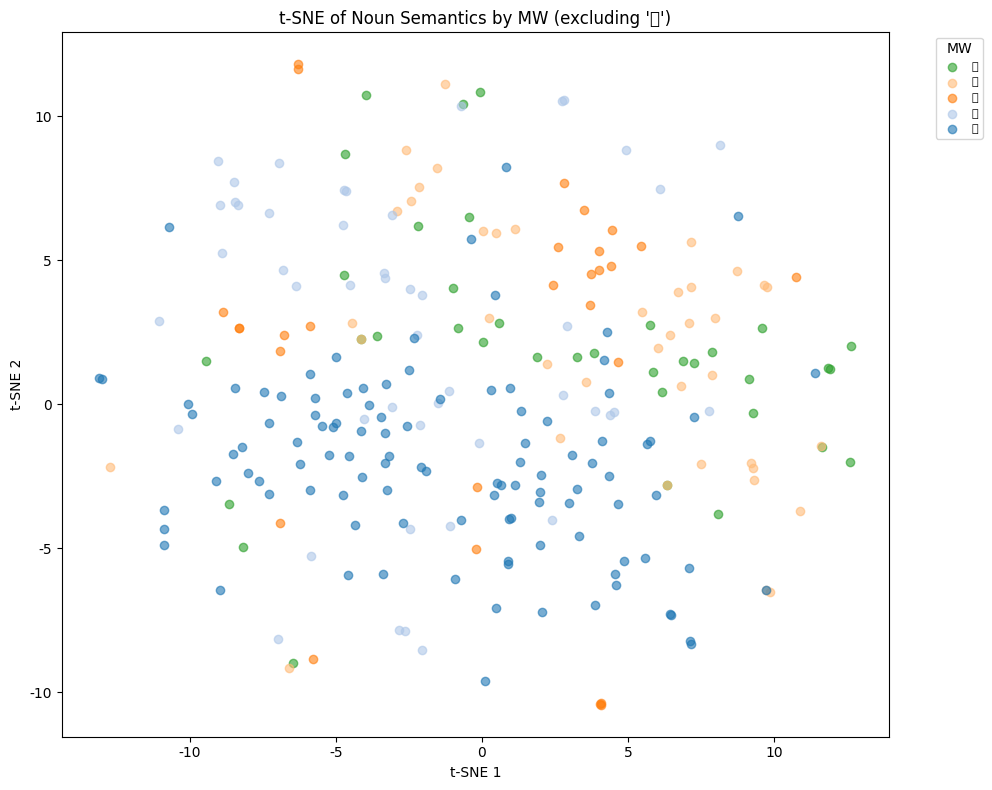

In [82]:

# 1. Filter out the rows where MW == "个"
# plot_df = noun_mw_df[noun_mw_df['MW'] != "个"].copy()

plot_df = common_df
# 2. Drop rows with missing vectors or invalid dimensions
plot_df = plot_df.dropna(subset=['noun_semantics'])
plot_df = plot_df[plot_df['noun_semantics'].apply(lambda x: len(x) == 300)]  # Ensure vectors have the correct length

# 3. Stack vectors into a matrix for t-SNE
X = np.vstack(plot_df['noun_semantics'].values)

# 4. Run t-SNE (using 2 components for 2D visualization)
tsne = TSNE(n_components=2, random_state=42, init='pca', perplexity=30)
X_2d = tsne.fit_transform(X)

# 5. Add t-SNE results to DataFrame
plot_df['tsne_x'] = X_2d[:, 0]
plot_df['tsne_y'] = X_2d[:, 1]

# 6. Get a list of unique MWs and assign a color palette
unique_mws = plot_df['MW'].unique()
colors = sns.color_palette("tab20", len(unique_mws))  # Use a larger, distinct colormap

# 7. Create a dictionary to map MWs to colors
mw_to_color = {mw: colors[i % len(colors)] for i, mw in enumerate(unique_mws)}  # Ensures uniqueness with modulo

# 8. Plot
plt.figure(figsize=(10, 8))

# Loop through MW groups and plot with unique color
for name, group in plot_df.groupby('MW'):
    plt.scatter(group['tsne_x'], group['tsne_y'], label=name, alpha=0.6, color=mw_to_color[name])

plt.title("t-SNE of Noun Semantics by MW (excluding '个')")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='MW', fontsize=8)
plt.tight_layout()
plt.show()

ValueError: perplexity must be less than n_samples

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

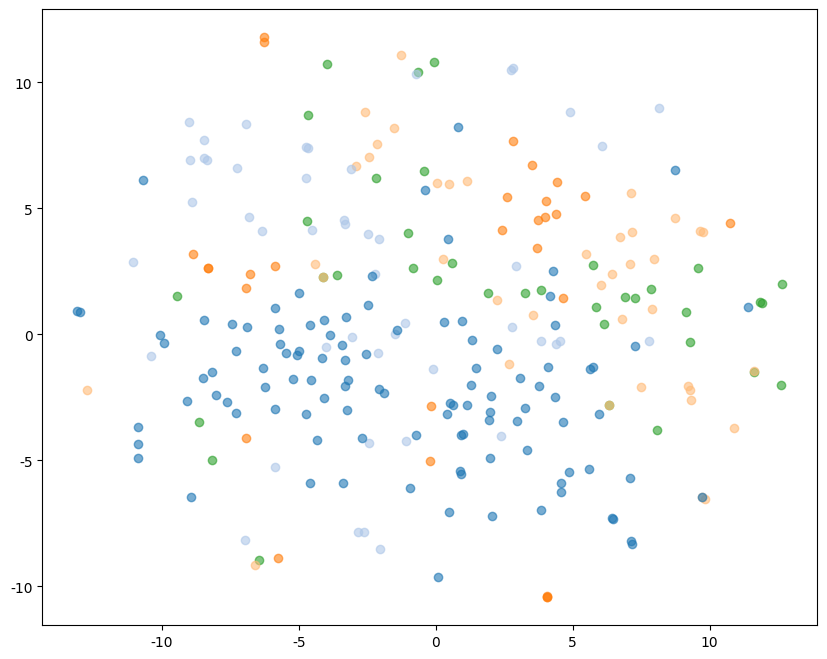

In [83]:

# 1. Filter out the rows where MW == "个"
# plot_df = noun_mw_df[noun_mw_df['MW'] != "个"].copy()

plot_df = common_df
# 2. Drop rows with missing vectors or invalid dimensions
plot_df = plot_df.dropna(subset=['noun_semantics'])
plot_df = plot_df[plot_df['noun_semantics'].apply(lambda x: len(x) == 300)]  # Ensure vectors have the correct length

# 3. Stack vectors into a matrix for t-SNE
X = np.vstack(plot_df['noun_semantics'].values)

# 4. Run t-SNE (using 2 components for 2D visualization)
tsne = TSNE(n_components=2, random_state=42, init='pca', perplexity=30)
X_2d = tsne.fit_transform(X)

# 5. Add t-SNE results to DataFrame
plot_df['tsne_x'] = X_2d[:, 0]
plot_df['tsne_y'] = X_2d[:, 1]

# 6. Get a list of unique MWs and assign a color palette
unique_mws = plot_df['MW'].unique()
colors = sns.color_palette("tab20", len(unique_mws))  # Use a larger, distinct colormap

# 7. Create a dictionary to map MWs to colors
mw_to_color = {mw: colors[i % len(colors)] for i, mw in enumerate(unique_mws)}  # Ensures uniqueness with modulo

# 8. Plotting words (noun semantics)
plt.figure(figsize=(10, 8))

for name, group in plot_df.groupby('MW'):
    plt.scatter(group['tsne_x'], group['tsne_y'], label=name, alpha=0.6, color=mw_to_color[name])

# 9. Plotting MW centroids (use 'mw_centroid' column from the DataFrame)
centroid_tsne = np.vstack(plot_df.groupby('MW')['MW_centroid'].first().values)  # Getting the centroids
centroid_tsne_2d = tsne.fit_transform(centroid_tsne)

# Plot the centroids
plt.scatter(centroid_tsne_2d[:, 0], centroid_tsne_2d[:, 1], marker='X', color='black', s=100, label='Centroids', edgecolor='k')

# Add legends and labels
plt.title("t-SNE of Noun Semantics by MW (excluding '个') with MW Centroids")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='MW', fontsize=8)
plt.tight_layout()
plt.show()

In [81]:
# Do PCA and plot

# Cosine Similarity

In [82]:
# Calculate Cosine Similarties. 

In [83]:
from sklearn.metrics import silhouette_score

# Stack noun vectors
X = np.vstack(plot_df['noun_semantics'].values)

# Convert MWs to numeric cluster labels
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder().fit_transform(plot_df['MW'])

# Compute silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: -0.165


In [84]:
# Pretty bad score, in other words, teh clusters are super overlapping

In [85]:
from scipy.spatial.distance import cosine

intra_dists = []
inter_dists = []

for i, row in plot_df.iterrows():
    noun_vec = row['noun_semantics']
    mw = row['MW']
    centroid = row['MW_centroid']
    
    # Intra-cluster distance
    intra = cosine(noun_vec, centroid)
    intra_dists.append(intra)
    
    # Inter-cluster distance (to centroids of other MWs)
    for other_mw, other_centroid in plot_df.groupby('MW')['MW_centroid'].first().items():
        if other_mw != mw:
            inter = cosine(noun_vec, other_centroid)
            inter_dists.append(inter)

# Compare means
import numpy as np
print(f"Mean Intra-cluster Cosine Distance: {np.mean(intra_dists):.3f}")
print(f"Mean Inter-cluster Cosine Distance: {np.mean(inter_dists):.3f}")


Mean Intra-cluster Cosine Distance: 0.389
Mean Inter-cluster Cosine Distance: 0.747


According to chat-gpt:
intra-cluaster should be low (0-0.3)
inter-cluster should be high (>0.5
a gap of bigger than 0.2 means a mennaingful clustering 

In [86]:
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(intra_dists, inter_dists, equal_var=False)
print(f"T-test p-value: {p_val:.5f}")

T-test p-value: 0.00000


In [87]:
noun_mw_df.to_csv('output/noun_mw_cosineSim.csv')